In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm
#
m_file_prefixes= ['/tmp/total_flow.', '/tmp/occupancy.', '/tmp/speed.']

## NOTE: All visualizations against dataset with no standardization

# Mean Vector

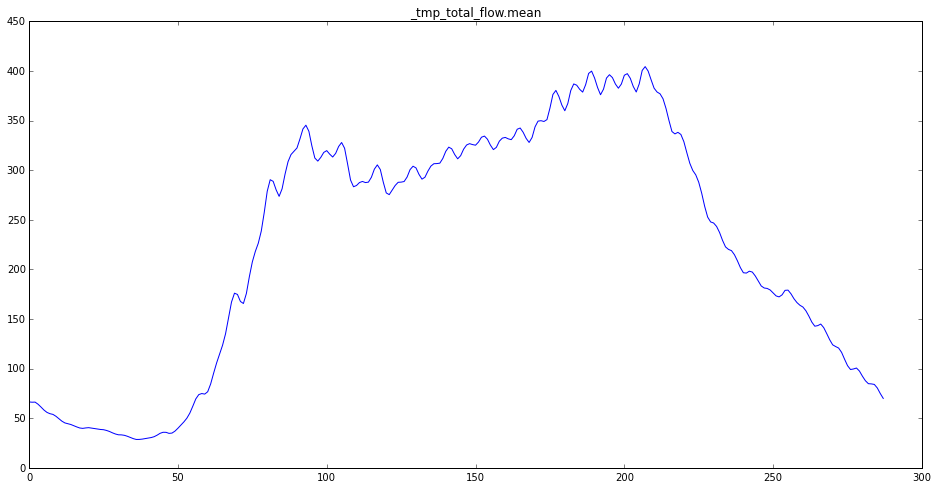

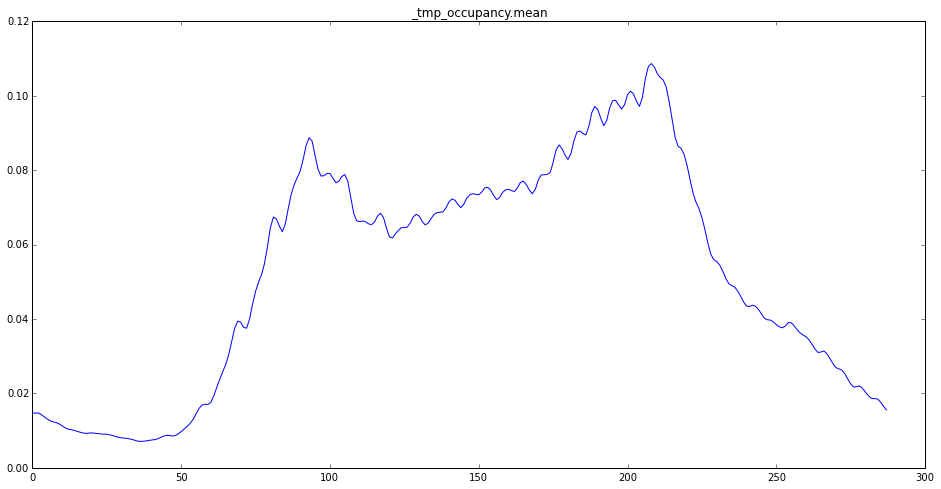

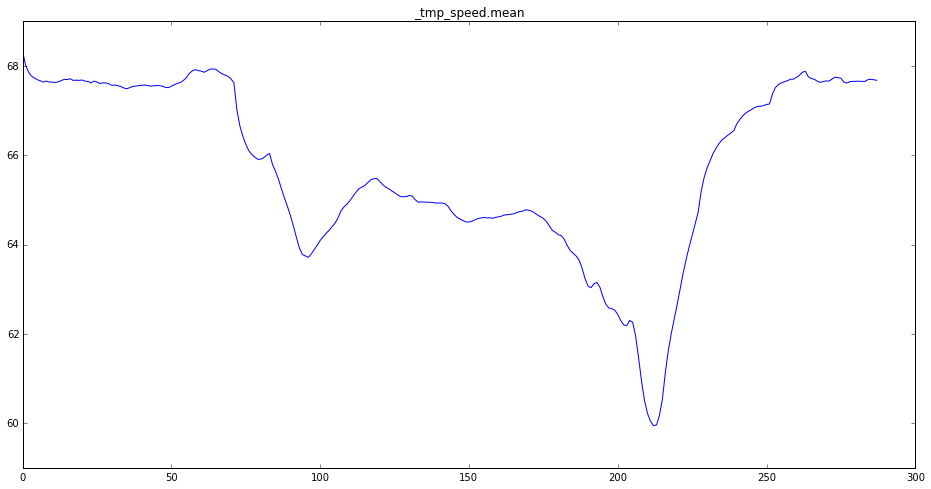

In [4]:
for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'mean_vector.01_2010.csv'
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    ax.plot(m_mean_vector)
    #
    m_title= p.replace('/', '_') + 'mean'
    ax.set_title(m_title)
    #
    m_output_filename= p + 'mean_vector.pdf'
    fig.savefig(m_output_filename)

# Perc. Variance Explained

[0, 0.70725332720388656, 0.88743700886893206, 0.92895025260180419, 0.94204205847318057, 0.94966238721106511, 0.95549028751460796, 0.95892832925748761, 0.96144963656699023, 0.9636550891856025, 0.96532765935978271, 0.96691171238628837, 0.96815698496202185, 0.96921638888643291, 0.97015861511698587, 0.97088605248108983, 0.97159234809447748, 0.97218786500076715, 0.97274471744094371, 0.97325516162150494, 0.97374832364698971, 0.97420943916814995, 0.97462356864468647, 0.97501693510379728, 0.97539123264946337, 0.97576082161017985, 0.97611588984461628, 0.97646167918876037, 0.97677757439988544, 0.97707469490239529, 0.97736234296670554]
[0, 0.4615612233682142, 0.69612666368442966, 0.76253366059509842, 0.79862967679324193, 0.82121415949136367, 0.84110310037933045, 0.85571353252127325, 0.86911660794354562, 0.87949224668003179, 0.88874436152356906, 0.89565854104269504, 0.90164505376086479, 0.90735922588172413, 0.91201820804621514, 0.91644158914241591, 0.9206911464286216, 0.92412690200680458, 0.927208

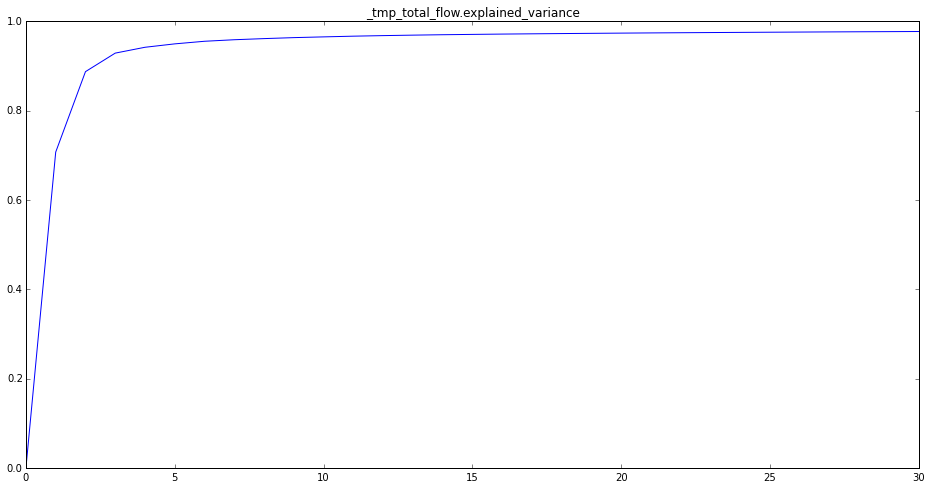

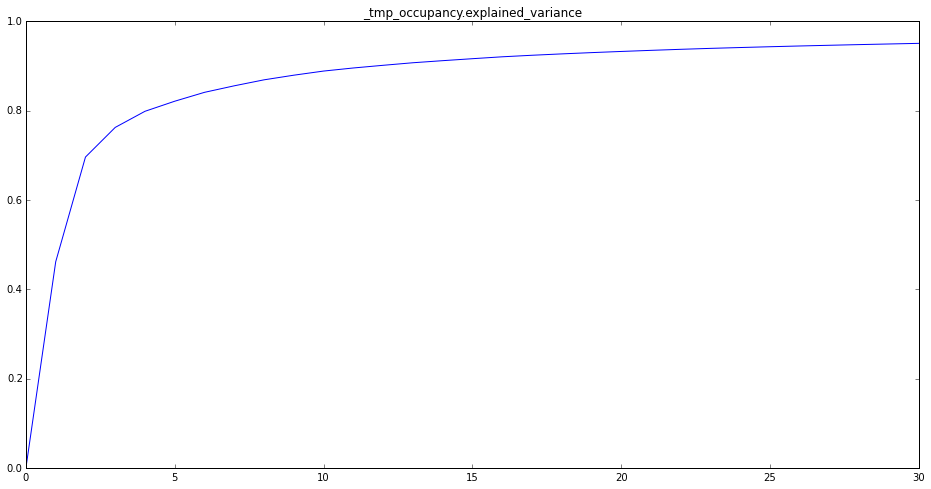

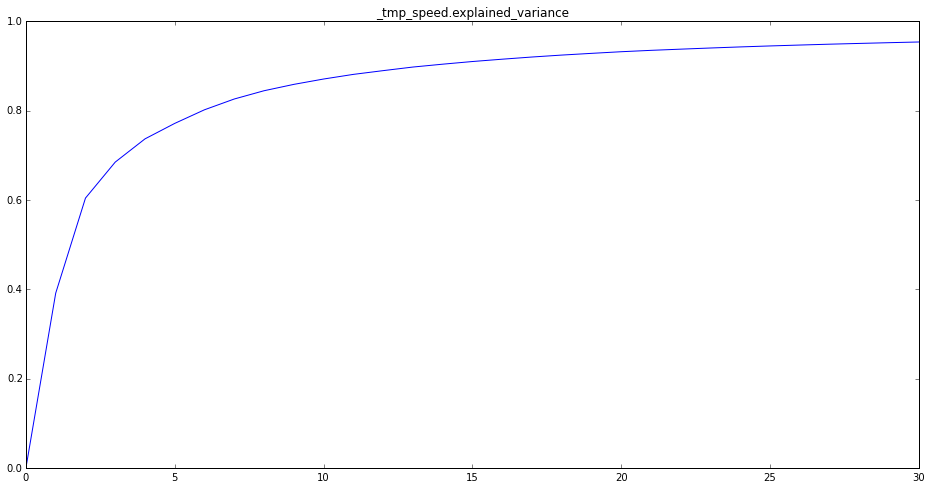

In [5]:
k= 30

for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'eigenvalues.01_2010.csv'
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
    m_plot_arr = ([0, ] + list(np.cumsum(m_eig_values[:k])))
    print(m_plot_arr)
    ax.plot(m_plot_arr)
    m_title= p.replace('/', '_') + 'explained_variance'
    ax.set_title(m_title)
    #
    m_output_filename= p + 'explained_variance.pdf'
    fig.savefig(m_output_filename)

# Top 10 Eigenvectors

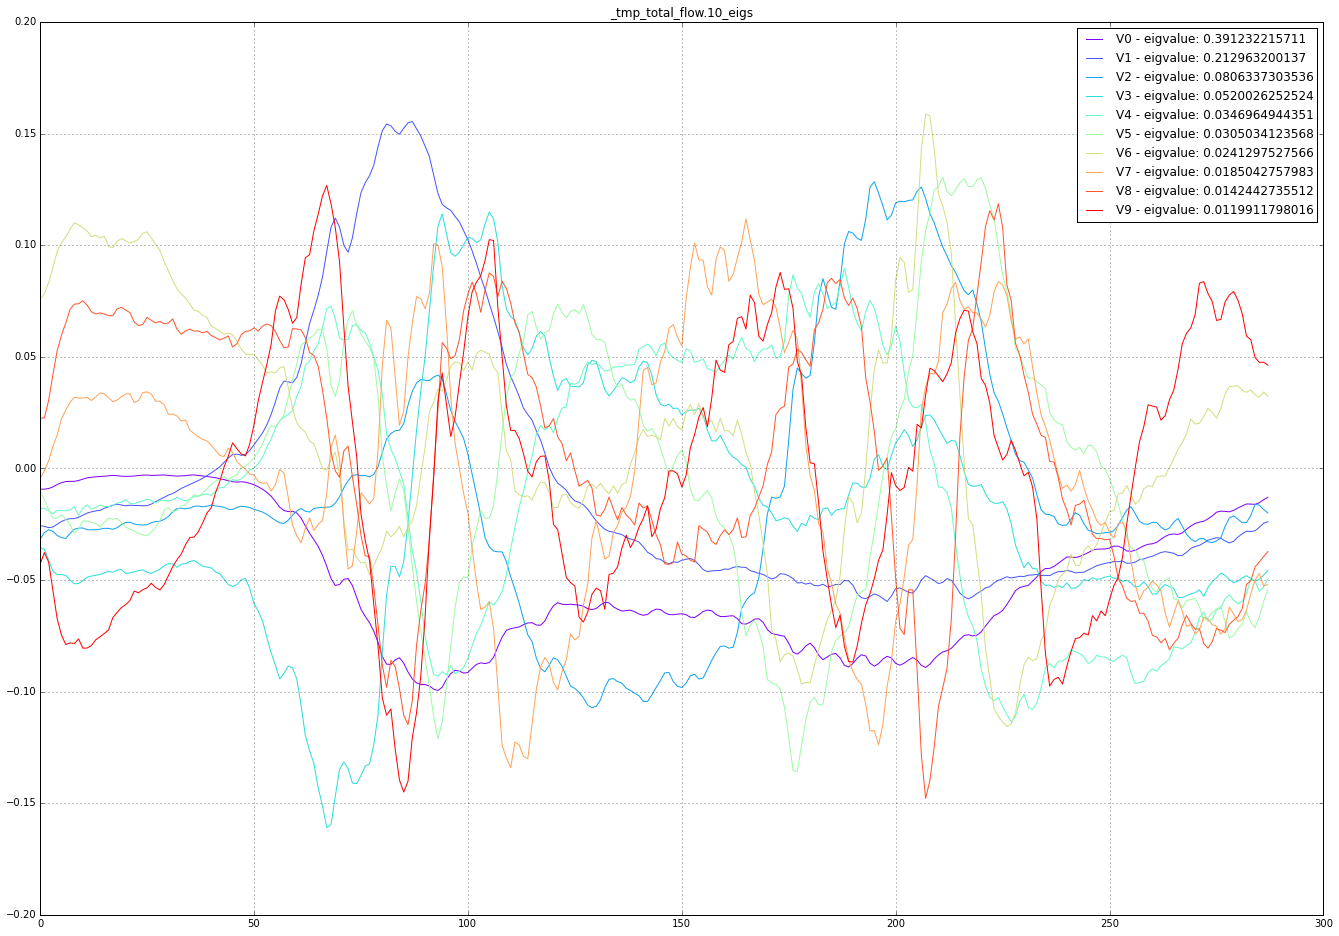

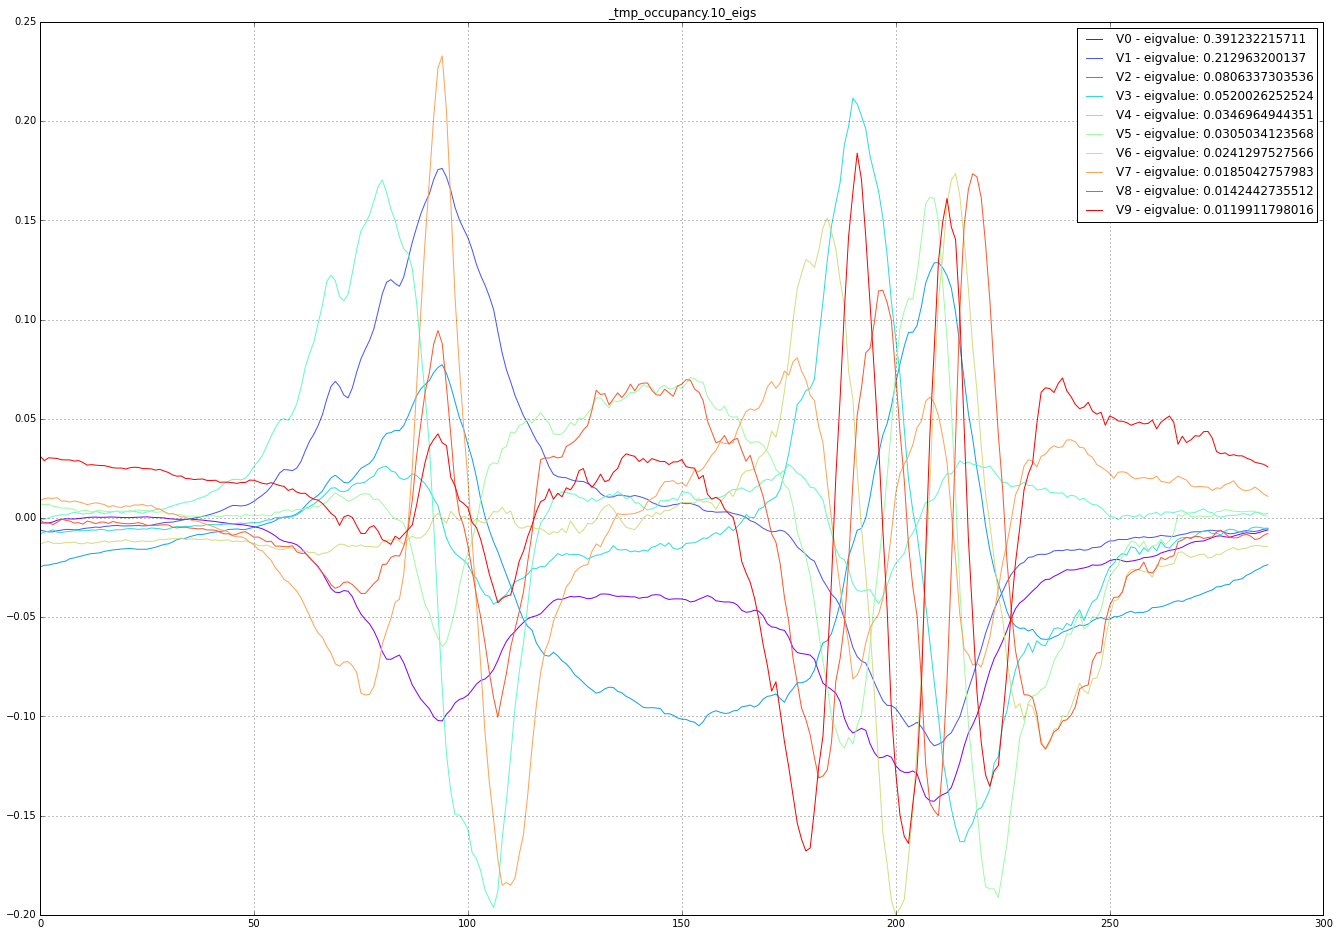

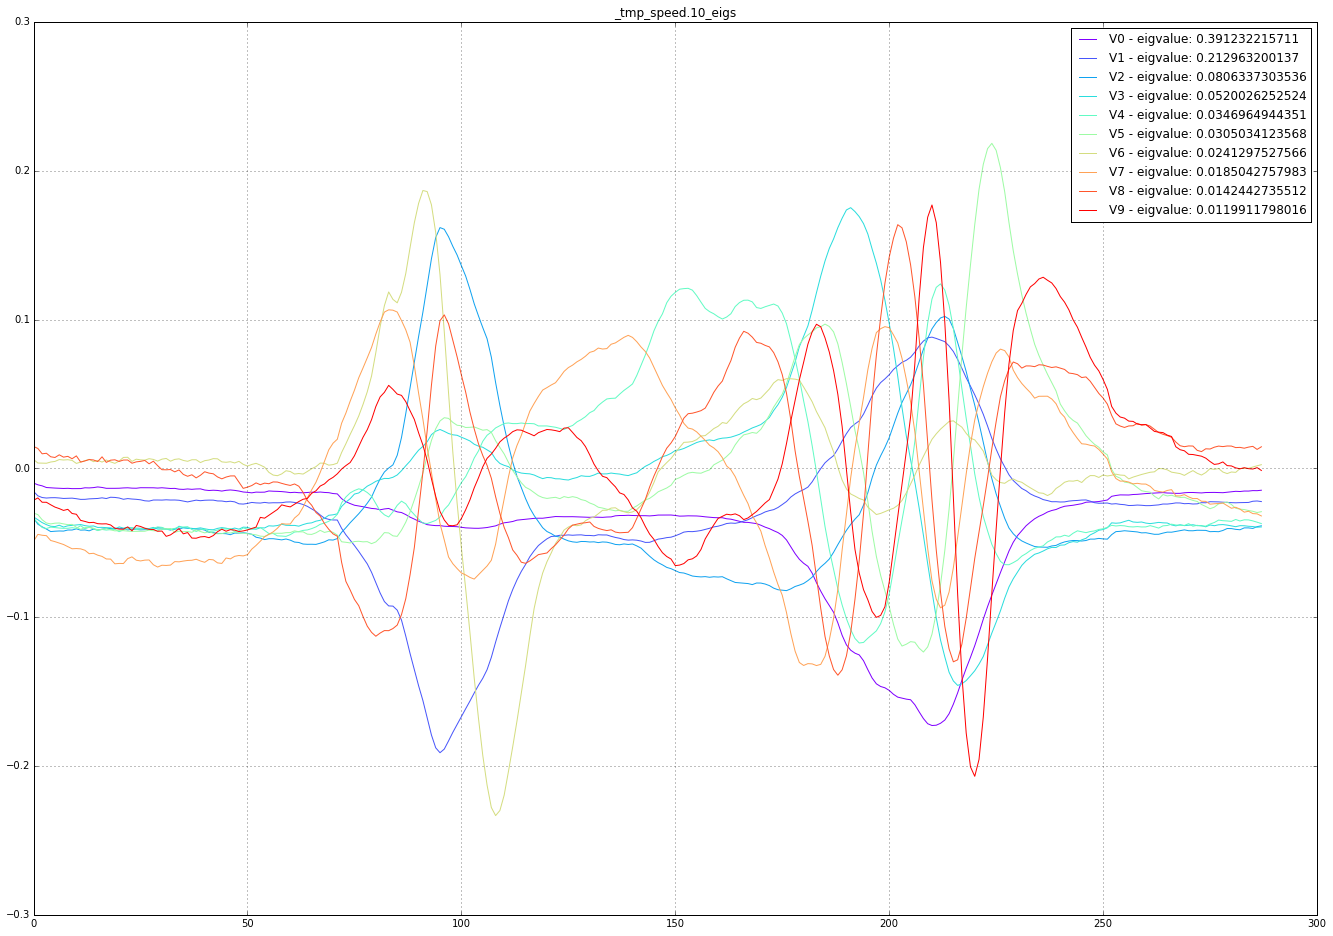

In [17]:
from matplotlib.pyplot import cm

n= 10
for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.01_2010.csv'
    m_eigs= pd.read_csv(m_filename, header=None).values
    #
    m_eigs_t= m_eigs.T
    colors=cm.rainbow(np.linspace(0,1,n))

    width= 23
    height= 16
    fig, ax= plt.subplots(figsize=(width,height))
    l_x= [i for i in xrange(shape(m_eigs_t)[1])]
    for i in xrange(n):
        l_y= m_eigs_t[i]
        m_eig_value= m_eig_values[i]
        m_label= 'V{} - eigvalue: {}'.format(i, m_eig_value)
        ax.plot(l_x, l_y, color=colors[i], label=m_label)
    ax.grid()
    ax.legend()
    
    m_title= p.replace('/', '_') + '10_eigs'
    ax.set_title(m_title)
    #
    m_output_filename= p + '10_eigs.pdf'
    fig.savefig(m_output_filename)

# Reconstruction on Top Eigenvectors

In [ ]:
def get_reconstruction(U, Mean, x, k):
    # Compute the projection of the data on the top k eigen-vectors
    #
    Eig = np.matrix(U.T)
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

In [ ]:
ks = [2, 4, 6, 8, 10]
rows= 5
columns= len(ks)

fig, axes = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True, figsize=(42, 35))
plt.tight_layout()
for row in xrange(rows):
    x = m_samples[row]
    for col in xrange(columns):
        k= ks[col]
        m_rec_struct = get_reconstruction(m_eigs_t, m_mean_vector, x, k)
        m_orig_x = m_rec_struct[0]
        m_rec = m_rec_struct[1]

        ax = axes[row, col]
        ax.plot(m_orig_x, c='g', label='orig')
        ax.plot(m_rec, c='b', label='recon')
        ax.set_xlim([0, len(m_orig_x)])
        ax.set_title("{} eigs, sample {}".format(k, row))
        ax.legend()
        if row == (rows - 1):
            ax.set_xlabel("column_idx")
fig.savefig("/tmp/sample_reconstruction.pdf")